In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from requests.models import HTTPError
import time

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Internshala

/content/gdrive/My Drive/Internshala


In [ ]:
df = pd.read_csv("amazonScraping.csv")

In [ ]:
df = df[['Asin', 'country']]

In [ ]:
df.head()

,Asin,country
0,1015,de
1,1015,fr
2,000004458X,de
3,000004458X,fr
4,1002198,de


In [ ]:
session = requests.session()
session.proxies = {}
session.proxies['http'] = 'socks5://localhost:9150' #9150 for browser; 9050 for TOR service
session.proxies['https'] = 'socks5://localhost:9150'

In [ ]:
#!pip install stem

     |████████████████████████████████| 2.9 MB 31.6 MB/s 
  Created wheel for stem: filename=stem-1.8.0-py3-none-any.whl size=436052 sha256=eac366d3352090c2f1cb681efecd160244ed97d982678214fa1f9686881d541f
  Stored in directory: /root/.cache/pip/wheels/77/73/98/4f0966106838e9a11710b56790f413ce6ae62e78257f8653c9
Successfully built stem


In [ ]:
#!pip install fake_useragent

  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=422e3e3d22e1f8014241b1a52cd50d9158eaf80af83ca9a2573c0480f1b7d08e
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
Successfully built fake-useragent


In [ ]:
from stem import Signal
from stem.control import Controller
def switchIP():
    with Controller.from_port(port = 9051) as controller:
        controller.authenticate()
        controller.signal(Signal.NEWNYM)

In [ ]:
from fake_useragent import UserAgent
headers = {
    #### I cannot reveal the headers until I get hired!
    #### It's secret blend for my recepie
}

In [ ]:
errors = ['Amazon.fr page non trouvée', 'Page introuvable', 'Amazon.de Die Website wurde nicht gefunden', 
 '404 - Documento non trovato', 'Amazon.de Die Website wurde nicht gefunden', '404 - Documento no encontrado']

In [ ]:
URL_lst = []
prodTitle_lst = []
prodImg_lst = []
prodPrice_lst = []
prodDesc_lst = [] 

program_starts = time.time()

for i in range(0, 100):
  URL = "https://www.amazon." + df.country[i] + "/dp/" + df.Asin[i]
  r = requests.get(str(URL), headers = headers)
  soup = BeautifulSoup(r.content, 'html.parser')
  website_title = soup.find('title').text
  
  #### ERROR HANDLING #####
  if (r.status_code == 404 | r.status_code == 503):
    #print("Page not available")
    continue
  elif (website_title in errors):
    #print("Page not available")
    continue

  print(i)
  
  #### TITLE #########
  title = str(soup.find("span", {"id":"productTitle"}).text.strip())
  try:
    subtitle = str(soup.find("span", {"id":"productSubtitle"}).text.strip())
  except:
    subtitle = ""
  title += " " + subtitle


  #### PRODUCT IMAGE #####
  try:
    try:
      temp = soup.find("div", {"id":"imgTagWrapperId"})
      imageURL = temp.find("img").attrs['src']
    except AttributeError:
      temp = soup.find("div", {"id":"img-canvas"})
      imageURL = temp.find("img").attrs['src']
  except AttributeError:
    imageURL = "NA"


  ###### PRODUCT PRICE #####
  try:
    try:
      try:
        price = str(soup.find("span", {"class":"a-size-base a-color-price a-color-price"}).text.strip())
      except AttributeError:
        price = soup.find_all("span", {"class":"a-color-base"})[1].text.strip()
    except AttributeError:
      price = str(soup.find("span", {"class":"a-offscreen"}))
  except:
    price = "NA"

  if (price == ''):
    try:
      price = str(soup.find("span", {"class":"a-offscreen"}).text.strip())
    except:
      price = "NA"

  ###### PRODUCT DESCRIPTION #######
  temp_ = []
  try:
    try:
      desc = soup.find("div", {"id":"productDescription"})
      descr = desc.find("p").text.strip()
    except AttributeError:
      desc = soup.find("ul", {"class":"a-unordered-list a-nostyle a-vertical a-spacing-none detail-bullet-list"})
      for i in desc.find_all("li"):
        temp_.append(i.text.replace("\n", ""))
      descr = "".join(str(x).strip() for x in temp_)
  except AttributeError:
    descr = "NA"

  URL_lst.append(URL)
  prodTitle_lst.append(title)
  prodImg_lst.append(imageURL)
  prodPrice_lst.append(price)
  prodDesc_lst.append(descr) 

  temp_.clear()

now = time.time()
print("Total Elapsed Time: {}".format(now - program_starts))

Total Elapsed Time: 47.416157484054565


Time taken for every 100 iterations:

| Rows | Time |
| --- | ----------- |
| 0-100 | 47.41 |
| 100-200 | 74.71 |
| 200-300 | 63.18 |
| 300-400 | 55.80 |
| 400-500 | 49.62 |
| 500-600 | 72.87 |
| 600-700 | 63.10 |
| 700-800 | 48.78 |
| 800-900 | 54.42 |
| 900-1000 | 44.84 |

In [ ]:
#### Creating a dataframe from lists
res_0_100 = pd.DataFrame(list(zip(URL_lst, prodTitle_lst, prodImg_lst, prodPrice_lst, prodDesc_lst)), 
                       columns = ['URL', 'Product Title', 'Product Image URL', 'Product Price', 'Product Description'])

In [ ]:
res_0_100

,URL,Product Title,Product Image URL,Product Price,Product Description
0,https://www.amazon.de/dp/000004458X,Old Spice Shaving Cream - 70 g (original) - Pa...,https://images-eu.ssl-images-amazon.com/images...,€8.00,Old Spice Shaving Cream - 70g (Original) - Pac...
1,https://www.amazon.de/dp/000101742X,Short Story: Violoncello und Klavier. (Cello-B...,https://images-eu.ssl-images-amazon.com/images...,€5.95,Publisher ‏...
2,https://www.amazon.fr/dp/000101742X,Short story (dushkin/hegyi) violon Partition –...,https://images-eu.ssl-images-amazon.com/images...,"à partir de 22,88 €",Éditeur ‏ ...
3,https://www.amazon.de/dp/000102163X,Concerto grosso g-Moll: Weihnachtskonzert. op....,https://images-eu.ssl-images-amazon.com/images...,from €18.00,Publisher ‏...
4,https://www.amazon.fr/dp/000102163X,Concerto grosso 8 g opus 6 partitu Partition –...,https://images-eu.ssl-images-amazon.com/images...,"à partir de 30,99 €",Éditeur ‏ ...
5,https://www.amazon.de/dp/000103863X,Concertino B-Dur: Violine und Orchester. Klavi...,https://images-eu.ssl-images-amazon.com/images...,€12.65,Publisher ‏...
6,https://www.amazon.fr/dp/000103863X,Concertino bes violon Partition – 1 janvier 2000,https://images-eu.ssl-images-amazon.com/images...,"à partir de 14,69 €",Éditeur ‏ ...
7,https://www.amazon.de/dp/000104317X,"Concerto in E flat ""Dumbarton Oaks"": für Kamme...",https://images-eu.ssl-images-amazon.com/images...,€18.00,Publisher ‏...
8,https://www.amazon.fr/dp/000104317X,Concert es kammerorchester parti musique d'ens...,https://images-eu.ssl-images-amazon.com/images...,"27,08 €",Éditeur ‏ ...
9,https://www.amazon.de/dp/000104348X,Musik für Kinder: Im Fünftonraum. Vol. 1. Sing...,https://images-eu.ssl-images-amazon.com/images...,€22.00,Publisher ‏...


In [ ]:
res_0_100.to_csv('Results/res_0_100.csv')

In the above step, I have saved the data in a dataframe. Similarly I've ran the `for` loop for every 100 rows from the given `df`.
<br>
Same file convention is used throghout to make sure that, I can access them easioly in the futre and when reading them, I can use regex to read them simultaneously.


In [ ]:
### Append data from multiple dfs to create a single df containing all records
appended_data = []
for i in range(0, 1000, 100):
  file = "Results/res_" + str(i) + "_" + str(i + 100) + ".csv"
  appended_data.append(pd.read_csv(file))

appended_data = pd.concat(appended_data)

The above code takes all the saved `csv` files and merges them to make a new `df` with all the data from `0-1000`.

In [ ]:
appended_data

,Unnamed: 0,URL,Product Title,Product Image URL,Product Price,Product Description
0,0,https://www.amazon.de/dp/000004458X,Old Spice Shaving Cream - 70 g (original) - Pa...,https://images-eu.ssl-images-amazon.com/images...,€8.00,Old Spice Shaving Cream - 70g (Original) - Pac...
1,1,https://www.amazon.de/dp/000101742X,Short Story: Violoncello und Klavier. (Cello-B...,https://images-eu.ssl-images-amazon.com/images...,€5.95,Publisher ‏...
2,2,https://www.amazon.fr/dp/000101742X,Short story (dushkin/hegyi) violon Partition –...,https://images-eu.ssl-images-amazon.com/images...,"à partir de 22,88 €",Éditeur ‏ ...
3,3,https://www.amazon.de/dp/000102163X,Concerto grosso g-Moll: Weihnachtskonzert. op....,https://images-eu.ssl-images-amazon.com/images...,from €18.00,Publisher ‏...
4,4,https://www.amazon.fr/dp/000102163X,Concerto grosso 8 g opus 6 partitu Partition –...,https://images-eu.ssl-images-amazon.com/images...,"à partir de 30,99 €",Éditeur ‏ ...
...,...,...,...,...,...,...
3,3,https://www.amazon.fr/dp/000417870X,Stucke(3) op.142 orgue Broché – 1 janvier 2000,https://images-eu.ssl-images-amazon.com/images...,"18,15 €",Éditeur ‏ ...
4,4,https://www.amazon.de/dp/000420736X,L'ARLESIENNE-SUITE NR. 2 ORCHESTRE Paperback –...,https://images-eu.ssl-images-amazon.com/images...,€56.34,Publisher ‏...
5,5,https://www.amazon.fr/dp/000420736X,L'arlesienne-suite nr. 2 orchestre Broché – 1 ...,https://images-eu.ssl-images-amazon.com/images...,"52,14 €",Éditeur ‏ ...
0,0,https://www.amazon.de/dp/000421143X,EIN DEUTSCHES REQUIEM 2 KLAV Paperback – 1 Jan...,https://images-eu.ssl-images-amazon.com/images...,€92.00,Publisher ‏...


Now, we have scrapped the data, it requires some cleaning before we move ahead.

## Data Cleaning

In [ ]:
import re

In [ ]:
#### Remove special characters and spaces from df

appended_data['Product Price'] = appended_data['Product Price'].apply(lambda x: re.sub('[^0-9.]', "", x.replace(",", ".")))
appended_data['Product Description'] = appended_data['Product Description'].str.replace('â€', '')
appended_data['Product Description'] = appended_data['Product Description'].str.replace(')', ') ')
appended_data['Product Description'] = appended_data['Product Description'].apply(lambda x: re.sub(' + ',' ', x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
appended_data.head()

,Unnamed: 0,URL,Product Title,Product Image URL,Product Price,Product Description
0,0,https://www.amazon.de/dp/000004458X,Old Spice Shaving Cream - 70 g (original) - Pa...,https://images-eu.ssl-images-amazon.com/images...,8.00,Old Spice Shaving Cream - 70g (Original) - Pac...
1,1,https://www.amazon.de/dp/000101742X,Short Story: Violoncello und Klavier. (Cello-B...,https://images-eu.ssl-images-amazon.com/images...,5.95,"Publisher ‏ : ‎ SCHOTT MUSIC GmbH & Co KG, Mai..."
2,2,https://www.amazon.fr/dp/000101742X,Short story (dushkin/hegyi) violon Partition –...,https://images-eu.ssl-images-amazon.com/images...,22.88,Éditeur ‏ : ‎ SCHOTT (1 janvier 2000) Langue ‏...
3,3,https://www.amazon.de/dp/000102163X,Concerto grosso g-Moll: Weihnachtskonzert. op....,https://images-eu.ssl-images-amazon.com/images...,18.00,"Publisher ‏ : ‎ SCHOTT MUSIC GmbH & Co KG, Mai..."
4,4,https://www.amazon.fr/dp/000102163X,Concerto grosso 8 g opus 6 partitu Partition –...,https://images-eu.ssl-images-amazon.com/images...,30.99,Éditeur ‏ : ‎ SCHOTT (1 janvier 2000) Langue ‏...


In [ ]:
### Remove unnamed column
data = appended_data.loc[:, ~appended_data.columns.str.contains('^Unnamed')]

In [ ]:
### Reset index
data.reset_index(drop = True, inplace = True)

In [ ]:
data.tail()

,URL,Product Title,Product Image URL,Product Price,Product Description
88,https://www.amazon.fr/dp/000417870X,Stucke(3) op.142 orgue Broché – 1 janvier 2000,https://images-eu.ssl-images-amazon.com/images...,18.15,Éditeur ‏ : ‎ BREITKOPF (1 janvier 2000) Langu...
89,https://www.amazon.de/dp/000420736X,L'ARLESIENNE-SUITE NR. 2 ORCHESTRE Paperback –...,https://images-eu.ssl-images-amazon.com/images...,56.34,Publisher ‏ : ‎ BREITKOPF (1 Jan. 2000) Langua...
90,https://www.amazon.fr/dp/000420736X,L'arlesienne-suite nr. 2 orchestre Broché – 1 ...,https://images-eu.ssl-images-amazon.com/images...,52.14,Éditeur ‏ : ‎ BREITKOPF (1 janvier 2000) Langu...
91,https://www.amazon.de/dp/000421143X,EIN DEUTSCHES REQUIEM 2 KLAV Paperback – 1 Jan...,https://images-eu.ssl-images-amazon.com/images...,92.00,Publisher ‏ : ‎ BREITKOPF (1 Jan. 2000) Langua...
92,https://www.amazon.fr/dp/000421143X,Ein deutsches requiem 2 klav Broché – 1 janvie...,https://images-eu.ssl-images-amazon.com/images...,174.99,Éditeur ‏ : ‎ BREITKOPF (1 janvier 2000) Langu...


Now, it looks super-clean!!!

## Saving the output in desired format (i.e JSON and DB)

In [ ]:
import json

In [ ]:
#### Get JSON output
output = data.to_json(orient = "records")

In [ ]:
print(output)

[{"URL":"https:\/\/www.amazon.de\/dp\/000004458X","Product Title":"Old Spice Shaving Cream - 70 g (original) - Pack of 2 ","Product Image URL":"https:\/\/images-eu.ssl-images-amazon.com\/images\/I\/41xHbjdSXJL._SY300_SX300_QL70_ML2_.jpg","Product Price":"8.00","Product Description":"Old Spice Shaving Cream - 70g (Original) - Pack of 2 - Good lubrication quality in Old Spice Lather shaving foam gives optimal gliding action a tighter, comfortable shave. Richer, longer - lasting foam stays on during your shave. Use Old Spice Lather shaving cream where you will find the masculine freshness of the old spice."},{"URL":"https:\/\/www.amazon.de\/dp\/000101742X","Product Title":"Short Story: Violoncello und Klavier. (Cello-Bibliothek) Sheet music \u2013 6 Feb. 1986","Product Image URL":"https:\/\/images-eu.ssl-images-amazon.com\/images\/I\/41zw0783tpL._SX198_BO1,204,203,200_QL40_ML2_.jpg","Product Price":"5.95","Product Description":"Publisher \u200f : \u200e SCHOTT MUSIC GmbH & Co KG, Mainz (6

In [ ]:
### Save output to a external file
with open('Results/ouput.json', 'w', encoding = 'utf-8') as f:
  json.dump(output, f, ensure_ascii = False, indent = 4)

### Connecting to Database

I've used `psycopg2` for this purpose. Same could be done using `sqlAlchemy`.
<br>
I've used `ElephantSQL` for the the purpose of this task. SInce it is free and provides `postgreSQL` it fit m requirements.

In [ ]:
import psycopg2
import urllib.parse as up
import numpy

In [ ]:
up.uses_netloc.append("postgres")
url = up.urlparse("CONNECTION STRING")
conn = psycopg2.connect(database = url.path[1:], user = url.username, password = url.password, host = url.hostname, port = url.port)

In [ ]:
cur = conn.cursor()

In [ ]:
### Query to create a table
cur.execute("CREATE TABLE amazonscraping (URL TEXT PRIMARY KEY, Title TEXT, Price TEXT, ImageURL TEXT, Description TEXT);")

In [ ]:
conn.commit()

In [ ]:
### Function to dump data from df to DB.

def insertIntoTable(table, df):
  tuples = list(set([tuple(x) for x in df.to_numpy()]))
  cols = ','.join(list(df.columns))
  query = "INSERT INTO %s(URL, Title, Price, ImageURL, Description) VALUES (%%s, %%s, %%s, %%s, %%s)"  % (table)

  try:
    cur.executemany(query, tuples)
    conn.commit()

  except (Exception, psycopg2.DatabaseError) as error:
    print("Error: %s" %error)
    conn.rollback()
    return 1

In [ ]:
insertIntoTable('amazonscraping', data)

Below is the image showing the Data base with the data that I've scraped.

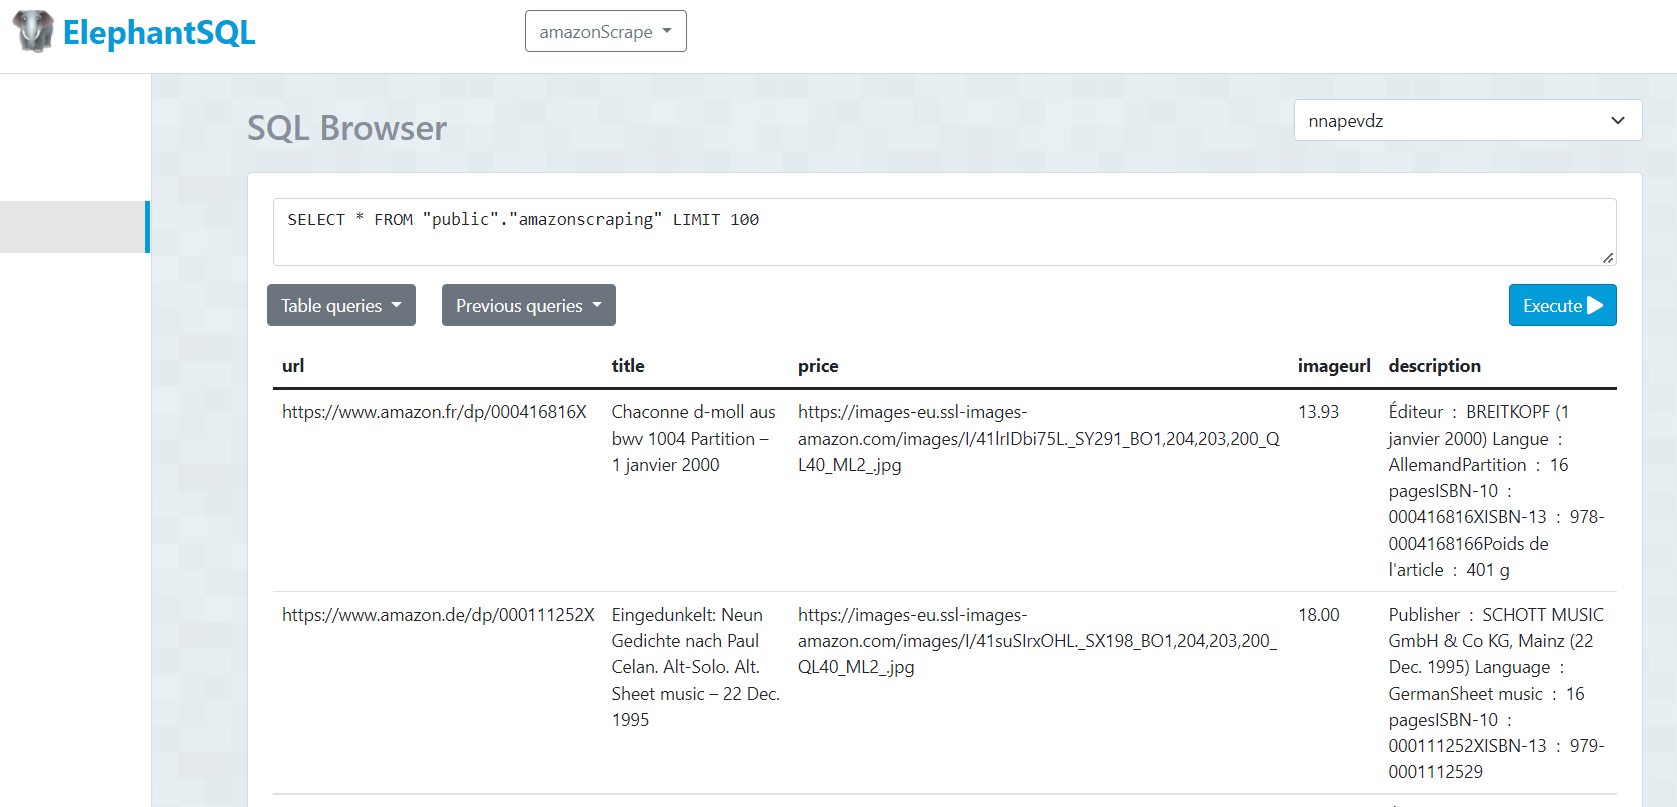